In [1]:
%matplotlib inline

In [89]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

def onehot_encode(z):
    n = len(z)
    result = np.zeros((n, 10))
    for i in range(n):
        result[i, z[i]] = 1
    return result

(X_raw,y_raw), (X_test,y_test) = mnist.load_data()
X  = X_raw.reshape((60000,28*28)) / 255
y  = onehot_encode(y_raw)
Xt = X_test.reshape((10000,28*28)) / 255
yt = onehot_encode(y_test)

model = Sequential()
model.add(Dense(input_dim=28*28, units=400, activation='sigmoid'))
model.add(Dense(                 units=40, activation='sigmoid'))
model.add(Dense(                 units=10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [90]:
model.fit(X,y, epochs=10,  validation_data=(Xt,yt))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.4277 - acc: 0.8938 - val_loss: 0.1970 - val_acc: 0.9439
Epoch 2/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1640 - acc: 0.9519 - val_loss: 0.1474 - val_acc: 0.9563
Epoch 3/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.1055 - acc: 0.9696 - val_loss: 0.0970 - val_acc: 0.9692
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0748 - acc: 0.9775 - val_loss: 0.0862 - val_acc: 0.9743
Epoch 5/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0538 - acc: 0.9841 - val_loss: 0.0757 - val_acc: 0.9764
Epoch 6/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0406 - acc: 0.9880 - val_loss: 0.0694 - val_acc: 0.9785
Epoch 7/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0303 - acc: 0.9913 - val_loss: 0.

In [8]:
print(X.shape)

(60000, 28, 28)


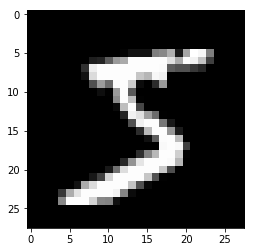

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X[0,:,:], cmap='gray')

In [52]:
(Theta1, bias1) = model.layers[0].get_weights()
(Theta2, bias1) = model.layers[1].get_weights()
(Theta3, bias1) = model.layers[2].get_weights()

In [55]:
print(Theta1.shape)
print(Theta2.shape)
print(Theta3.shape)

(784, 300)
(300, 20)
(20, 10)


In [58]:
Theta = Theta1@Theta2@Theta3

In [59]:
print(Theta.shape)

(784, 10)


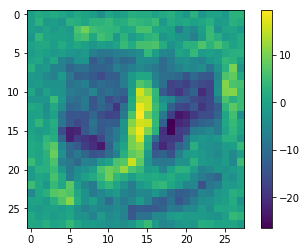

In [62]:
plt.imshow(Theta[:,1].reshape(28,28))
plt.colorbar()

In [63]:
import numpy as np

def get_webcam_image():
    try:
        import cv2
        webcam = cv2.VideoCapture(0)
        ok,img = webcam.read()
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except ImportError:
        from pygame import camera
        from pygame.surfarray import pixels3d
        camera.init()
        cameras = camera.list_cameras()
        print('Using camera {}'.format(cameras[0]))
        webcam = camera.Camera(cameras[0], (640,480))
        webcam.start()
        img = webcam.get_image()
        webcam.stop()
        return np.swapaxes(pixels3d(img),0,1)

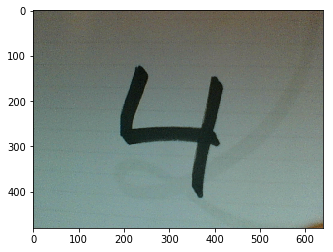

In [113]:
I = get_webcam_image()
plt.imshow(I)

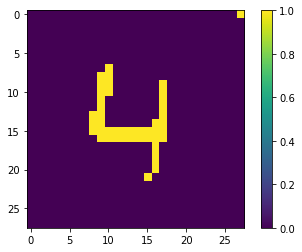

In [117]:
from scipy.misc import imresize
I2 = imresize(255-I[:,:,1], (28,28))
I2 = (I2 - np.min(I2)) / (np.max(I2) - np.min(I2))
I2 = I2>.6
plt.imshow(I2)
plt.colorbar()
plt.show()

In [118]:
guess = model.predict(I2.reshape((1,28*28)))

In [119]:
print(guess)
print(np.argmax(guess))
print(guess[0,np.argmax(guess)])

[[  4.17548058e-08   2.75520893e-06   1.46445859e-06   9.13753411e-08
    9.99973178e-01   6.38241374e-07   5.61997467e-07   5.32780359e-06
    3.76534572e-08   1.59890114e-05]]
4
0.999973


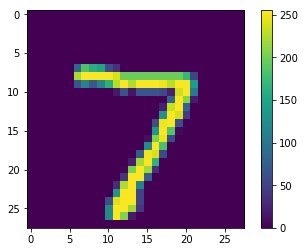

In [91]:
plt.imshow(X_test[0,:,:])
plt.colorbar()